#Installing necessary libraries

In [1]:
import numpy as np ## scientific computation
import pandas as pd ## loading dataset file
import matplotlib.pyplot as plt ## Visulization
!pip install nltk
import nltk  ## Preprocessing our text
from nltk.corpus import stopwords ## removing all the stop words
from nltk.stem.porter import PorterStemmer ## stemming of wordsv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install nltk
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Dataset preprocessing

In [4]:
#Our Task is to create a machine learning model that can accurately predict whether an email is a spam or not.

df = pd.read_csv("/content/spam.csv")


In [5]:
print(df.head())  ## top 5 rows of the dataframe


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [6]:
print(df.tail()) ## bottom 5 rows of the dataframe

      Unnamed: 0 label                                               text  \
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [8]:
df.isna().sum()


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [9]:
df.shape,df.ndim


((5171, 4), 2)

In [10]:
df.describe()


,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [11]:
df["label_num"].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

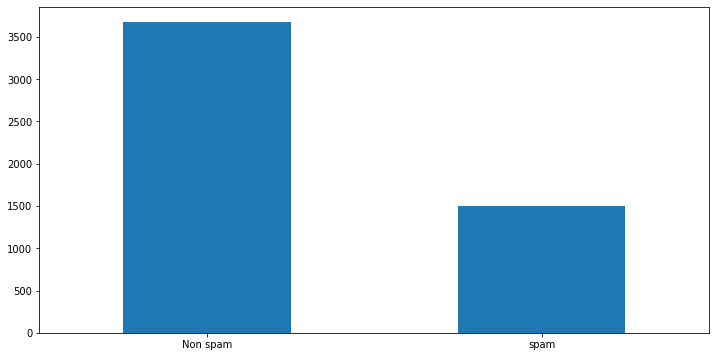

In [12]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

# Cleaning text dataset

In [13]:
length = len(df)
length

5171

In [14]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import re
corpus = []
length = len(df)
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(5171, 35000)

In [19]:
import pickle ## importing pickle used for dumping models

pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

In [20]:
y = df["label_num"].values
y

array([0, 0, 0, ..., 0, 0, 1])

#Splitting dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##train size 80% and test size 20%

#Model training

In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [23]:
model.fit(X_train, y_train)


MultinomialNB()

In [24]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
y_pred[:20],y_test[:20]

(array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]))

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[716  16]
 [ 17 286]] 96.81159420289856


In [27]:
import pickle
pickle.dump(model, open("spam.pkl", "wb"))

In [28]:
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9681159420289855

In [29]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = model.predict(new_X_test)
    return new_y_pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("SPAM")
else :
    print("NOT SPAM")

Enter new review...hi scott, i was wondering you have submitted your project or not
NOT SPAM
